In [369]:
import pandas as pd
import csv

In [370]:
#Columns: title, studio, domestic_gross, foreign_gross, year
bom_movie_gross = pd.read_csv('Data/bom.movie_gross.csv.gz', compression='gzip')

#Columns: nconst, primary_name, birth_year, death_year, primary_profession, known_for_titles
imdb_name_basics = pd.read_csv('Data/imdb.name.basics.csv.gz', compression='gzip')

#Columns: title_id, ordering, title, region, language, types, attributes, is_original_title
imdb_title_akas = pd.read_csv('Data/imdb.title.akas.csv.gz', compression='gzip')

#Columns: tconst, primary_title, original_title, start_year, runtime_minutes, genres
imdb_title_basics = pd.read_csv('Data/imdb.title.basics.csv.gz', compression='gzip')

#Columns: tconst, directors, writers
imdb_title_crew = pd.read_csv('Data/imdb.title.crew.csv.gz', compression='gzip')

#Columns: tconst, ordering, nconst, category, job, characters
imdb_title_principals = pd.read_csv('Data/imdb.title.principals.csv.gz', compression='gzip')

#Columns: tconst, averagerating, numvotes
imdb_title_ratings = pd.read_csv('Data/imdb.title.ratings.csv.gz', compression='gzip')

#Columns: id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtie, studio
rt_movie_info = pd.read_csv('Data/rt.movie_info.tsv.gz', compression='gzip', sep = '\t')

#Columns: id, review, rating, fresh, critic, top_critic, publisher, date
rt_reviews = pd.read_csv('Data/rt.reviews.tsv.gz', compression='gzip', sep = '\t', encoding = 'latin1')

#Columns: Unnamed:0, genre_ids, original_language, original_title, popularity, release_date, title, vote_average, vote_count
tmdb_movies = pd.read_csv('Data/tmdb.movies.csv.gz', compression='gzip')

#Columns: id, release_date, movie, production_budget, domestic_gross, worldwide_gross
tn_movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz', compression='gzip')

In [371]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [372]:
#filter out nan values for domestic_gross and foreign_gross
bom_movie_gross.dropna(subset=["domestic_gross","foreign_gross"], inplace=True)

In [373]:
#sort by 'domestic_gross' to find out highest grossing films domestically (USA)
top_20_gross = bom_movie_gross.sort_values(by=['domestic_gross']).tail(20)
top_20_gross

,title,studio,domestic_gross,foreign_gross,year
2762,Jumanji: Welcome to the Jungle,Sony,404500000.0,557600000,2017
735,The Hunger Games,LGF,408000000.0,286400000,2012
2322,Captain America: Civil War,BV,408100000.0,745200000,2016
1128,Iron Man 3,BV,409000000.0,805800000,2013
2767,Wonder Woman,WB,412600000.0,409300000,2017
0,Toy Story 3,BV,415000000.0,652000000,2010
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
1131,The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013
729,The Dark Knight Rises,WB,448100000.0,636800000,2012
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015


In [374]:
#list of top 20 movie titles
top_20_list = list(top_20_gross['title'])
top_20_list

['Jumanji: Welcome to the Jungle',
 'The Hunger Games',
 'Captain America: Civil War',
 'Iron Man 3',
 'Wonder Woman',
 'Toy Story 3',
 'Jurassic World: Fallen Kingdom',
 'The Hunger Games: Catching Fire',
 'The Dark Knight Rises',
 'Avengers: Age of Ultron',
 'Finding Dory',
 'Beauty and the Beast (2017)',
 'Rogue One: A Star Wars Story',
 'Incredibles 2',
 'Star Wars: The Last Jedi',
 "Marvel's The Avengers",
 'Jurassic World',
 'Avengers: Infinity War',
 'Black Panther',
 'Star Wars: The Force Awakens']

In [375]:
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [376]:
#check to see if one of our top 20 titles appear in primary_title
imdb_title_basics[imdb_title_basics.isin(['Avengers: Infinity War']).any(axis=1)]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
72820,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [377]:
#try to get a list with all the top 20 from imbd_title_basics so we can look at Genre ... 
imdb_title_basics_top_20 = []
for title in top_20_list:
    imdb_title_basics_top_20.append(imdb_title_basics[imdb_title_basics.isin([title]).any(axis=1)])


In [378]:
#imdb_title_basic
#imdb_title_crew
#imdb_name_basics
#imdb_title_ratings

imdb_title_basics_slim = imdb_title_basics[['tconst', 'primary_title', 'start_year', 'genres', 'runtime_minutes']]
imdb_name_basics_slim = imdb_name_basics[['nconst', 'primary_name', 'death_year']]
imdb_title_ratings_slim = imdb_title_ratings[['tconst', 'averagerating', 'numvotes']]

recent_imdb_title_basics = imdb_title_basics_slim[(imdb_title_basics_slim['start_year'] >= 2014) & (imdb_title_basics_slim['start_year'] <= 2018)]

imdb_title_ratings_half = imdb_title_ratings_slim[imdb_title_ratings_slim['numvotes'] >= imdb_title_ratings_slim['numvotes'].mean()]


one = recent_imdb_title_basics.merge(imdb_title_crew, how = 'inner')
imdb = one.merge(imdb_title_ratings_half, how = 'inner')



In [379]:
imdb

,tconst,primary_title,start_year,genres,runtime_minutes,directors,writers,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,2018,Drama,122.0,nm0000080,"nm0000080,nm0462648",6.9,4517
1,tt0315642,Wazir,2016,"Action,Crime,Drama",103.0,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",7.1,15378
2,tt0360556,Fahrenheit 451,2018,"Drama,Sci-Fi,Thriller",100.0,nm1023919,"nm0001969,nm1023919,nm0618881",4.9,14469
3,tt0365545,Nappily Ever After,2018,"Comedy,Drama,Romance",98.0,nm2223783,"nm0111845,nm10021676,nm1946260",6.4,6287
4,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",114.0,nm0291082,"nm0088747,nm0291082",6.5,105116
...,...,...,...,...,...,...,...,...,...
2544,tt8709036,A Christmas Prince: The Royal Wedding,2018,"Drama,Romance",92.0,nm0776271,"nm1405911,nm6912381",5.2,5186
2545,tt8954732,The Princess Switch,2018,Romance,101.0,nm0737517,"nm0076820,nm2997602",6.0,13993
2546,tt9124428,Champion,2018,"Drama,Romance,Sport",130.0,nm3446789,"nm3446789,nm2085861",8.5,4098
2547,tt9231140,A Man Called Ahok,2018,Drama,102.0,nm4563405,"nm5369998,nm4563413,nm4563405,nm10236344",9.1,4162


In [380]:
#split genres into individual strings, don't need this using the one below but keeping it just in case
#imdb['genres'] = imdb['genres'].str.split(pat=',')

In [381]:
imdb_split_genres = imdb.assign(genres=imdb.genres.str.split(",")).explode('genres')
#gross_split_directors = imdb_with_gross.assign(directors=imdb_with_gross.directors.str.split(",")).explode('directors')

In [382]:
imdb_split_genres

,tconst,primary_title,start_year,genres,runtime_minutes,directors,writers,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,2018,Drama,122.0,nm0000080,"nm0000080,nm0462648",6.9,4517
1,tt0315642,Wazir,2016,Action,103.0,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",7.1,15378
1,tt0315642,Wazir,2016,Crime,103.0,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",7.1,15378
1,tt0315642,Wazir,2016,Drama,103.0,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",7.1,15378
2,tt0360556,Fahrenheit 451,2018,Drama,100.0,nm1023919,"nm0001969,nm1023919,nm0618881",4.9,14469
...,...,...,...,...,...,...,...,...,...
2546,tt9124428,Champion,2018,Sport,130.0,nm3446789,"nm3446789,nm2085861",8.5,4098
2547,tt9231140,A Man Called Ahok,2018,Drama,102.0,nm4563405,"nm5369998,nm4563413,nm4563405,nm10236344",9.1,4162
2548,tt9495224,Black Mirror: Bandersnatch,2018,Drama,90.0,nm1720541,nm0111765,7.3,91349
2548,tt9495224,Black Mirror: Bandersnatch,2018,Mystery,90.0,nm1720541,nm0111765,7.3,91349


In [383]:
import matplotlib.pyplot as plt
%matplotlib inline

In [384]:
#average runtime for dramas:

dramas = imdb_split_genres[(imdb_split_genres['genres'] == 'Drama')]
dramas_runtimes_mean = dramas['runtime_minutes'].mean()
 
print(dramas_runtimes_mean)

#average runtime for 'comedy'
comedy = imdb_split_genres[(imdb_split_genres['genres'] == 'Comedy')]
comedy_runtimes_mean = comedy['runtime_minutes'].mean()
 
print(comedy_runtimes_mean)

111.94975911906401
105.14360313315927


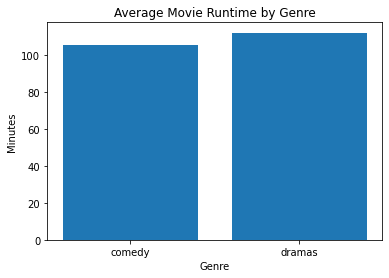

In [398]:
#plotting the average runtime for Comedy and Drama
x = 'comedy', 'dramas'
y = comedy_runtimes_mean, dramas_runtimes_mean

plt.bar(x, y)

plt.title("Average Movie Runtime by Genre")
plt.xlabel("Genre")
plt.ylabel("Minutes")


plt.show()


In [395]:
#dramas runtimes compared to ratings

dramas = imdb_split_genres[(imdb_split_genres['genres'] == 'Drama')]
dramas_runtimes = dramas[dramas['averagerating'] >= 7]['runtime_minutes']
top_dramas_ratings = dramas[dramas['averagerating'] >= 7]['averagerating']

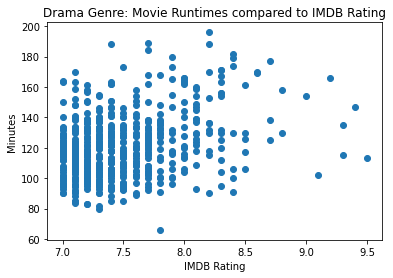

In [394]:
x = top_dramas_ratings
y = dramas_runtimes

plt.title("Drama Genre: Movie Runtimes compared to IMDB Rating")
plt.xlabel("IMDB Rating")
plt.ylabel("Minutes")

plt.scatter(x, y)
plt.show()

In [393]:
comedy = imdb_split_genres[(imdb_split_genres['genres'] == 'Comedy')]
comedy_runtimes = comedy[comedy['averagerating'] >= 7]['runtime_minutes']
top_comedy_ratings = comedy[comedy['averagerating'] >= 7]['averagerating']


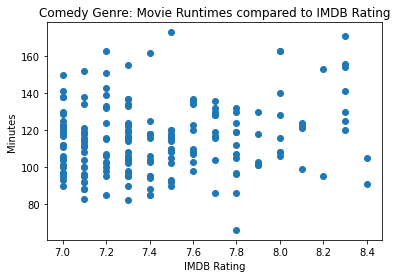

In [391]:
x = top_comedy_ratings
y = comedy_runtimes

plt.title("Comedy Genre: Movie Runtimes compared to IMDB Rating")
plt.xlabel("IMDB Rating")
plt.ylabel("Minutes")

plt.scatter(x, y)
plt.show()